## Homework - Aleksander Kluczka

In [1]:
from pprint import pprint
from qiskit import execute, IBMQ, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import Aer


qbit counts: {'01000001': 506, '01001011': 518}
'A' = 01000001, 'K' = 01001011


C:\Users\alaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


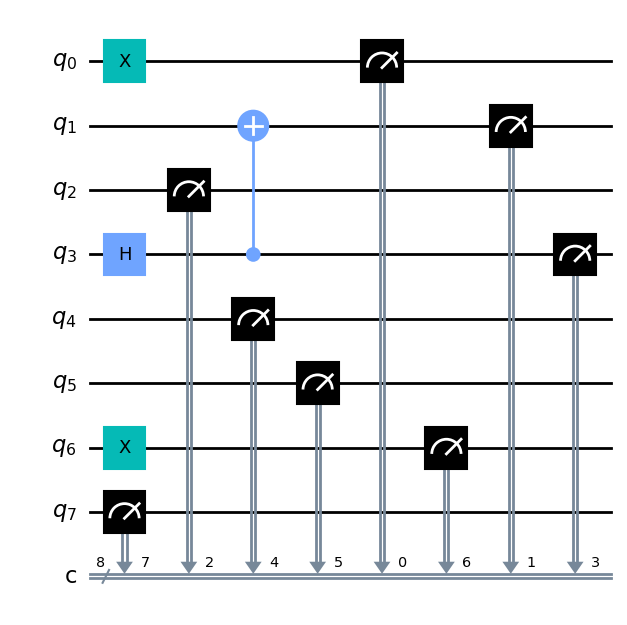

In [2]:
circuit = QuantumCircuit(8, 8)

circuit.x(0)
circuit.x(6)
circuit.h(3)
circuit.cx(3, 1)
for i in range(8):
    circuit.measure(i, i)

backend = Aer.get_backend("aer_simulator")

job = backend.run(circuit)

result = job.result()
counts = result.get_counts(circuit)
print(f"qbit counts: {counts}")
print(f"'A' = {ord('A'):08b}, 'K' = {ord('K'):08b}")

circuit.draw("mpl")


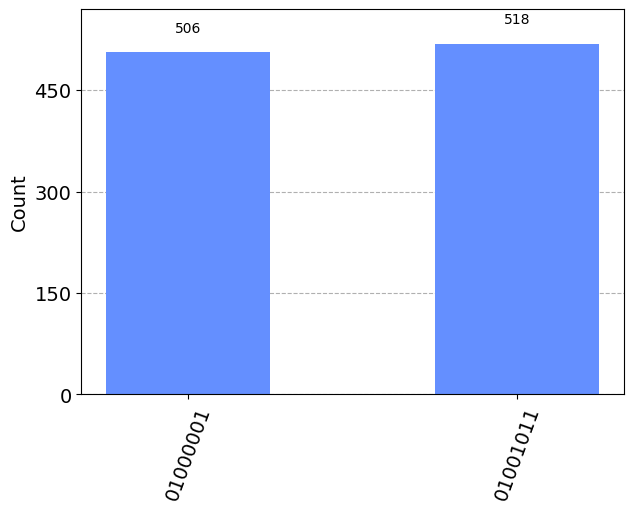

In [3]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)


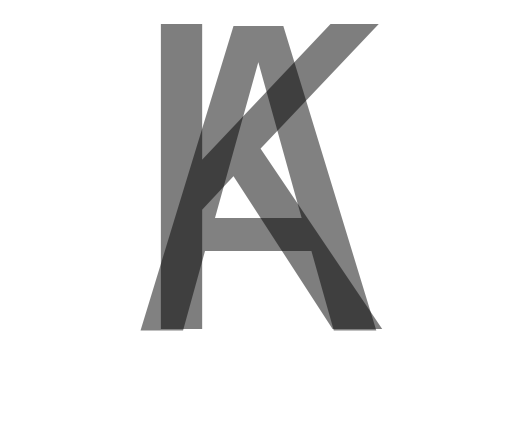

In [4]:
import matplotlib.pyplot as plt

sum = 0
for value in counts.values():
    sum += value

plt.rc("font", family="monospace")
plt.annotate(
    "A",
    (0.5, 0.5),
    va="center",
    ha="center",
    color=(0, 0, 0, counts[f"{ord('A'):08b}"] / sum),
    size=300,
)
plt.annotate(
    "K",
    (0.5, 0.5),
    va="center",
    ha="center",
    color=(0, 0, 0, counts[f"{ord('K'):08b}"] / sum),
    size=300,
)
plt.axis("off")
plt.show()


ibmqfactory.load_account:WARNING:2023-11-23 19:26:12,607: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]


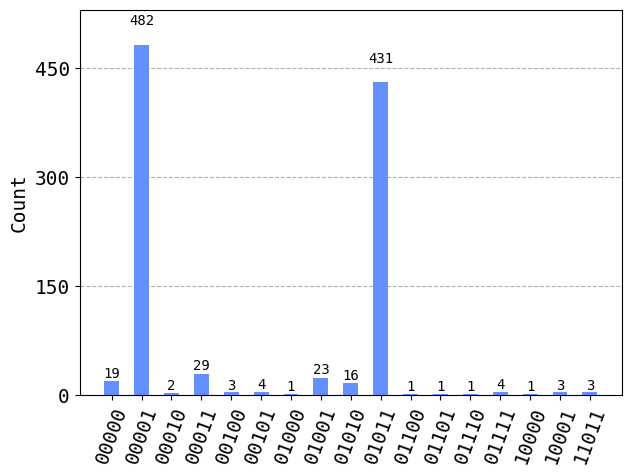

In [7]:
# Real machine
# 'A' = 01000001, 'K' = 01001011
# bit 7, bit 6, bit 5 are constant

circuit = QuantumCircuit(5, 5)

circuit.x(0)
circuit.h(3)
circuit.cx(3, 1)
for i in range(5):
    circuit.measure(i, i)

provider = IBMQ.load_account()
pprint(provider.backends())
# backend_overview()

real_backend = provider.get_backend("ibm_nairobi")
real_job = execute(circuit, real_backend, shots=1024)

real_job_id = real_job.job_id()
real_result = real_backend.retrieve_job(real_job_id).result()
real_counts = real_result.get_counts()

plot_histogram(real_counts)


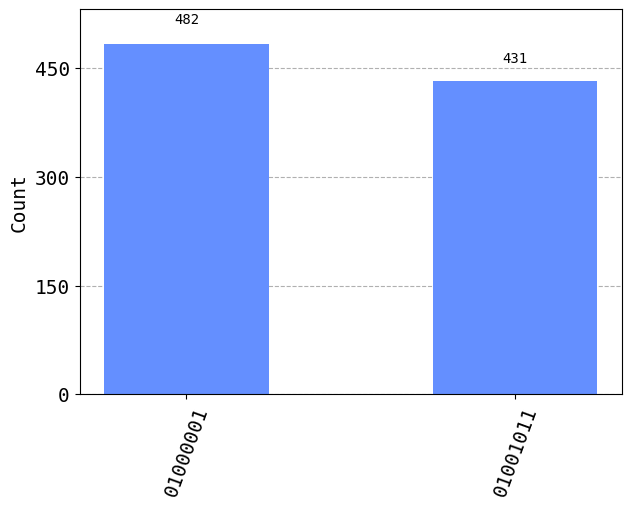

In [8]:
real_counts = {
    f"{ord('A'):08b}": real_counts["00001"],
    f"{ord('K'):08b}": real_counts["01011"],
}

plot_histogram(real_counts)
